### Desafio googleplaystore.cvs
* #### Leia o arquivo csv e realize as seguintes atividades sobre o dataset utilizando bibliotecas Pandas e Matplotlib. Remova as linhas duplicadas.


 ##### 1. Faça um gráfico de barras contendo os top 5 apps por número de instalação 

* No código abaixo são importadas as bibliotecas que serão usadas, logo após é carregado os dados do arquivo csv e é removida as duplicatas. Depois as linhas da coluna "Installs" são tratadas, usando comandos para substituir sinais que podem aparecer nos dados e outro para conversão de strings em número, e finalmente o comando erros = 'coerce' é usado para caso a conversão falhar esses valores vão se tornar em NaN e não vão causar erro. Logo após, foi usado o nlargest para selecionar os 5 maiores valores da coluna "Installs".
* Para o grafico foram usados comandos para criar o gráfico de barra com seus respectivos valores do eixo x e y, e valores para definição visual do gráfico, outros comandos foram usados para definir e ajustar títulos e rótulos

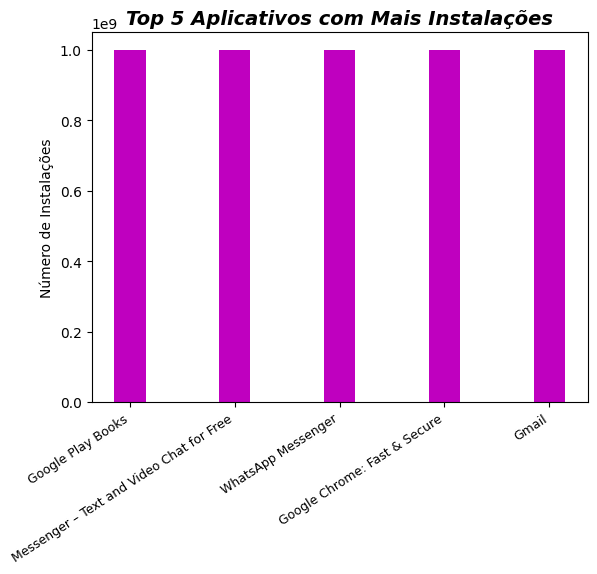

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\andra\Projetos\python\googleplaystore.csv').drop_duplicates()

df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',', '').str.replace('+', ''), errors='coerce')

x = df.nlargest(5, 'Installs')

plt.bar(x['App'], x['Installs'], width = 0.30, color='m')
plt.title('Top 5 Aplicativos com Mais Instalações',fontsize=14, fontweight='bold', fontstyle='italic')
plt.ylabel('Número de Instalações')
plt.xticks(rotation=33, fontsize=9, ha='right')
plt.show()


##### 2. Faça um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem. 

* No código abaixo são importadas as bibliotecas que serão usadas, logo após é carregado os dados do arquivo csv e é removida as duplicatas. Após ISSO, a coluna "Category" é convertida para uma lista e em seguida com uso do Counter se é contada quantas vezes cada categoria aparece. Então, são feitas listas com valores e nomes que aparecerão no gráfico, depois os dados da lista apps são editados para a melhor visualização na legenda que terá no gráfico, também é criada uma lista explode que define como o mesmo será entre as fatias, e também é definida uma paleta de cores.
* Com isso começa a criação do gráfico com seu tamanho e cartacteriscas que deixarão a visualizaão dos dados mais clara, também é incluído título e o layout é organizado. Finalmente é adIcionada a legenda com a formatação das categorias.

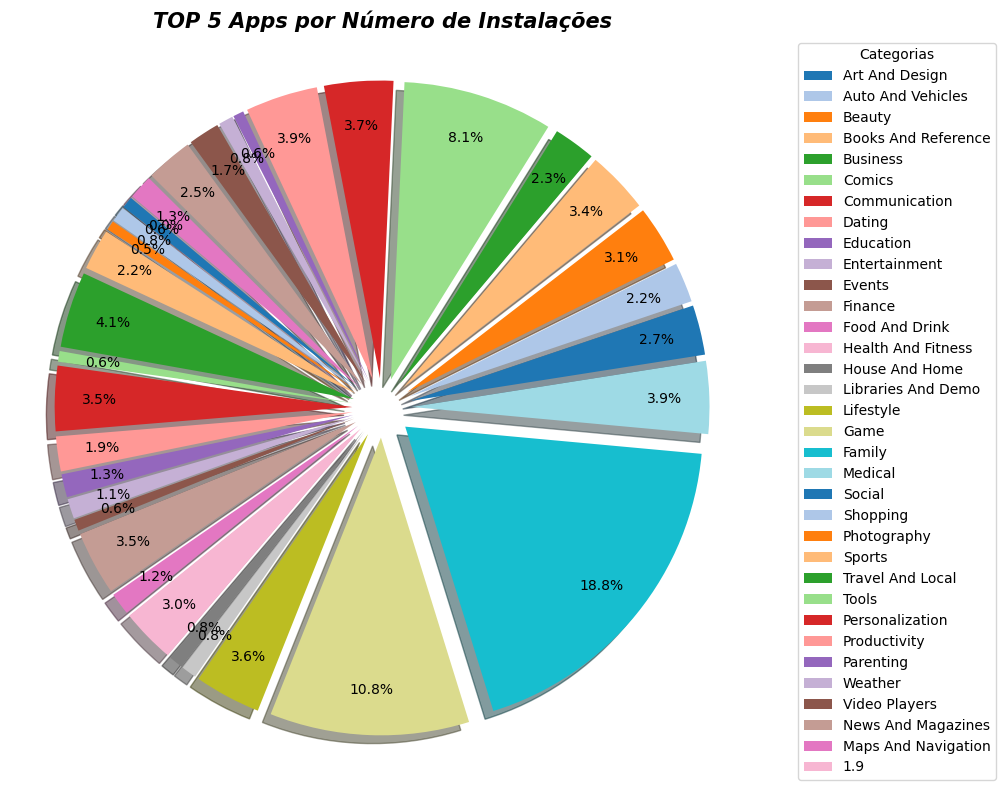

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv(r'C:\Users\andra\Projetos\python\googleplaystore.csv').drop_duplicates()
categorias = df['Category'].tolist()            
contando_categorias = Counter(categorias) 

apps = list(contando_categorias.keys())
valores = list(contando_categorias.values())

apps_formatados = [app.lower().replace('_', ' ').title() for app in apps]
explode = [0.1] * len(apps) 
cores = plt.cm.tab20.colors 

plt.figure(figsize=(14, 8))
plt.pie(valores, autopct='%1.1f%%', explode=explode, startangle=140, shadow=True, colors=cores[:len(apps)], pctdistance=0.85)
plt.title('TOP 5 Apps por Número de Instalações', fontsize=15, fontweight='bold', fontstyle='italic', ha='center')
plt.tight_layout()
plt.legend(apps_formatados, title="Categorias", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.show()

##### 4. Mostre qual app mais caro existente no dataset.


* No código abaixo é importada a biblioteca que será usada, logo após é carregado os dados do arquivo csv e é removida as duplicatas. Após isso os elementos da coluna "Price" são tratados e o argumento regex = True permite que se use expressões regulares para fazer a substiuição, após o tratamento a coluna price é convertida para valores númericos e de novo é usado o erros='coerce' para caso a conversão falhe. Caso tenham entradas inválidas é feito a remoção destas com o .dropna(), então é encontrado o nome do app correspondente a seu preço com o idxmax() e o loc[] para acessar essa linha específica.
* Por fim é impresso o resultado.

In [19]:
import pandas as pd

df = pd.read_csv(r'C:\Users\andra\Projetos\python\googleplaystore.csv').drop_duplicates()
df['Price'] = df['Price'].replace({'\\$': '', ' ': ''}, regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price'])
app_correspondente = df.loc[df['Price'].idxmax()]

print(f'Aplicativo mais caro: {app_correspondente["App"]} com o preço de: {app_correspondente["Price"]}')


Aplicativo mais caro: I'm Rich - Trump Edition com o preço de: 400.0


##### 5. Mostre quantos apps sçao classificados como 'Mature 17+'

* No código abaixo é importada a biblioteca que será usada, logo após é carregado os dados do arquivo csv e é removida as duplicatas, é feito o acesso a coluna "Content Rating" onde se contém a classificação de idade dos apps, então é contada a ocorrência de cada valor único na coluna e finalmente é usado o get() para "pegar" os apps que tem a classificação "Mature 17+" para ao fim imprimir na tela o resultado.

In [21]:
import pandas as pd

df = pd.read_csv(r'C:\Users\andra\Projetos\python\googleplaystore.csv').drop_duplicates()
mature = df['Content Rating'].value_counts().get('Mature 17+')
print(f"Total de apps classificados como 'Mature 17+': {mature}")

Total de apps classificados como 'Mature 17+': 447


##### 6. Mostre o top 10 apps por número de reviews bem como o respectivo número de reviews. Ordene a lista de forma descrescente por número de views.

* No código abaixo é importad a biblioteca que será usada, logo após é carregado os dados do arquivo csv e é removida as duplicatas. É feita então a conversão dos itens da coluna "Rating" para valores númericos, com o uso também do erros='coerce'. Depois é feito um agrupamento dos dados por app é pego a nota máxima para cada app, depois desses dados agrupados é selecionados os 10 valores mais altos para formar a lista final. Foi usado o to_string() no final para não aparecer o nome da série que nesse caso é o count.

In [30]:
import pandas as pd

df = pd.read_csv(r'C:\Users\andra\Projetos\python\googleplaystore.csv').drop_duplicates()
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

grouped_apps = df.groupby('App')['Rating'].max()  
top10_apps = grouped_apps.nlargest(10)  

print(top10_apps.to_string())


App
Life Made WI-Fi Touchscreen Photo Frame               19.0
211:CK                                                 5.0
30WPM Amateur ham radio Koch CW Morse code trainer     5.0
420 BZ Budeze Delivery                                 5.0
A-Y Collection                                         5.0
AC DC Power Monitor                                    5.0
ADS-B Driver                                           5.0
AI Today : Artificial Intelligence News & AI 101       5.0
AJ Blue Icon Pack                                      5.0
AJ Cam                                                 5.0


##### 6. Crie pelo menos mais 2 cálculos sobre o dataset e apresente um em formato de lista e outro em formato de valor. Por exemplo: "top 10 apps por número de reviews" e "o app mais caro existente no dataset"


**Média, Mediana e Desvio Padrão das notas dadas aos apps.**
* No código abaixo são importadas as bibliotecas que serão usadas, logo após é carregado os dados do arquivo csv e é removida as duplicatas. A coluna "Rating" é convertida para valores numéricos com o uso do errors='coerce' e então a média, mediana e desvio padrão é são calculados e seus respectivos valores são impressos.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\andra\Projetos\python\googleplaystore.csv').drop_duplicates()
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

media = df['Rating'].mean()
mediana = df['Rating'].median()
desviop = df['Rating'].std()

print(f"A média das notas dadas aos apps: {media:.2f}")
print(f"A mediana das notas dadas aos apps: {mediana:.2f}")
print(f'O desvio padrão das notas dadas aos apps  é: {desviop:.2f}')

A média das notas dadas aos apps: 4.19
A mediana das notas dadas aos apps: 4.30
O desvio padrão das notas dadas aos apps  é: 0.55


**Quantidade de Apps por categoria.**
* No código abaixo são importadas as bibliotecas que serão usadas, logo após a leitura do arquivo csv com a biblioteca pandas. É então contado quantos apps existem em cada categoria onde o índice é a categoria e os valores são as contagens, com o head(10) são selecionadas as dez categorias com mais aplicativos. Usei o to_string() apenas para não aparecer o nome da série que no caso é o value_counts.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\andra\Projetos\python\googleplaystore.csv').drop_duplicates()
quantidade_por_categoria = df['Category'].value_counts()

top_10_categorias = quantidade_por_categoria.head(10)

print(top_10_categorias.to_string())


Category
FAMILY             1943
GAME               1121
TOOLS               843
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     388
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360


##### 7. Crie pelo menos outras 2 formas gráficas de exibição dos indicadores acima utilizando a biblioteca matplotlib. Escolha tipos de gráficos diferentes dos explorados acima. Por exemplo: linhas e dispersão.

**1. Gráfico Média, Mediana e Desvio Padrão das notas dadas aos apps.**
* No código abaixo são importadas as bibliotecas que serão usadas, logo após a leitura do arquivo csv com a biblioteca pandas, começo a construção do gráfico definindo suas labels e values, tamanho, os dados que serão representados com marker, cor e especificações de texto. É definido também um título e rótulo, limites são criados e uma "grelha" é implementada para melhorar a visualização. Os valores que irão aparecer a cada marker são introduzidos e formatados para assim o plt.show ser executado.

A média das notas dadas aos apps: 4.19
A mediana das notas dadas aos apps: 4.30
O desvio padrão das notas dadas aos apps  é: 0.55


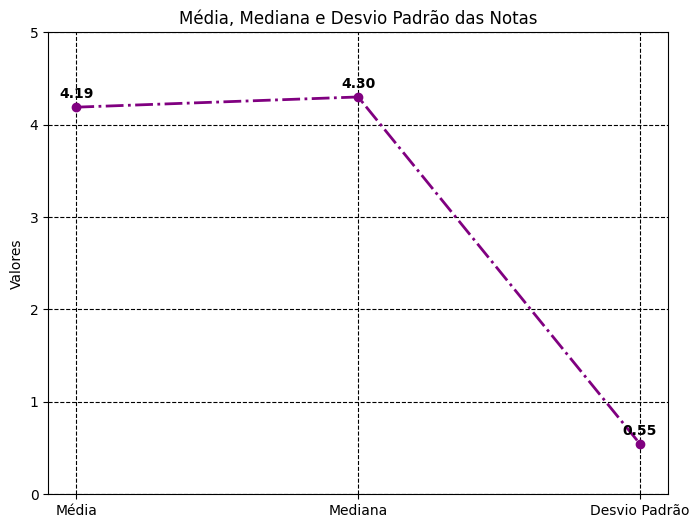

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\andra\Projetos\python\googleplaystore.csv').drop_duplicates()
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

media = df['Rating'].mean()
mediana = df['Rating'].median()
desviop = df['Rating'].std()

print(f"A média das notas dadas aos apps: {media:.2f}")
print(f"A mediana das notas dadas aos apps: {mediana:.2f}")
print(f'O desvio padrão das notas dadas aos apps  é: {desviop:.2f}')

labels = ['Média', 'Mediana', 'Desvio Padrão']
values = [media, mediana, desviop]

plt.figure(figsize=(8, 6))
plt.plot(labels, values, marker='o', color='purple', linestyle='dashdot', linewidth=2)
plt.title('Média, Mediana e Desvio Padrão das Notas')
plt.ylabel('Valores')
plt.ylim(0, 5)
plt.grid(color = 'black', linestyle='--')

for i, v in enumerate(values):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

plt.show()


**2. Gráfico Quantidade de Apps por categoria.**
* No código abaixo são importadas as bibliotecas que serão usadas, logo após a leitura do arquivo csv com a biblioteca pandas, começo a criação do gráfico criando sua figura, um conjunto de eixos e defino o tamanho da figura, após crio o gráfico com seus dados, um deles é obtido a partir do índice do df e o converto para formato de título, adiciono a exibição das porcentagens com uma casa decimal e defino o grau do start angle. adiciono o cículo branco no meio para fazer o efeito "donut", adiciono também o título, uso o plt. axis para garantir que o circulo fique perfeito e por fim uso o plt.show para mostrar o gráfico

Category
FAMILY             1943
GAME               1121
TOOLS               843
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     388
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360


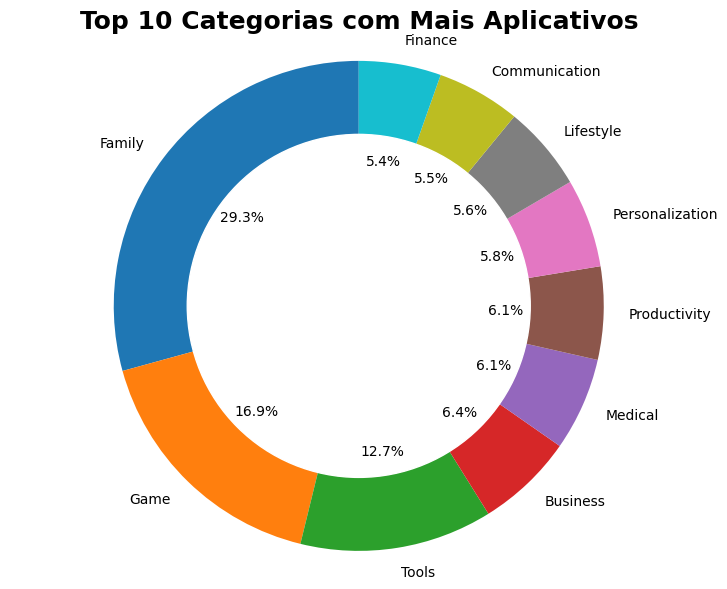

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\andra\Projetos\python\googleplaystore.csv').drop_duplicates()
quantidade_por_categoria = df['Category'].value_counts()

top_10_categorias = quantidade_por_categoria.head(10)

print(top_10_categorias.to_string())

fig, ax = plt.subplots(figsize=(9, 7))
ax.pie(top_10_categorias, labels=top_10_categorias.index.str.title(), autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.70, color='white')
fig.gca().add_artist(centre_circle)
plt.title('Top 10 Categorias com Mais Aplicativos', fontsize = 18, fontweight='bold')
plt.axis('equal')  

plt.show()